# ДЗ #10. Поиск аномалий в данных  <a id="0"></a>

### Датасет: https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

* [EDA](#1)
    * Baseline
* [Simple research](#2)
    * 3-сигмы
    * Межквартильное отклонение
* [ML](#3)
    * OneClassSVM
    * IsolationForest
    * TSNE

In [1]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

---
<a id="1"></a>
## EDA [(Наверх)](#0) 

In [2]:
data = pd.read_csv('data/creditcard.csv')

In [3]:
# Проверим корректно ли загружен CSV
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [4]:
# Узнаем размер датасета
data.shape

(284807, 31)

In [5]:
# Узнаем свойства датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Проверим на дубликаты
data.duplicated().sum()

1081

In [7]:
# ..и удалим если есть
data.drop_duplicates(inplace=True)

In [8]:
data.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.000854      -0.001596  ...      -0.000371      -0.000015   
std         1.179054       1.095492  ...       0.723909       0.724550   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000198       0.000214      -0.000232       0.000149   
std         0.623702       0.605627       0.521220       0.482053   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max        22.528412       4.584549       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.001763       0.000547      88.472687       0.001667  
std         0.395744       0.328027     250.399437       0.040796  
min       -22.565679     -15.430084       0.000000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max        31.612198      33.847808   25691.160000       1.000000  

[8 rows x 31 columns]

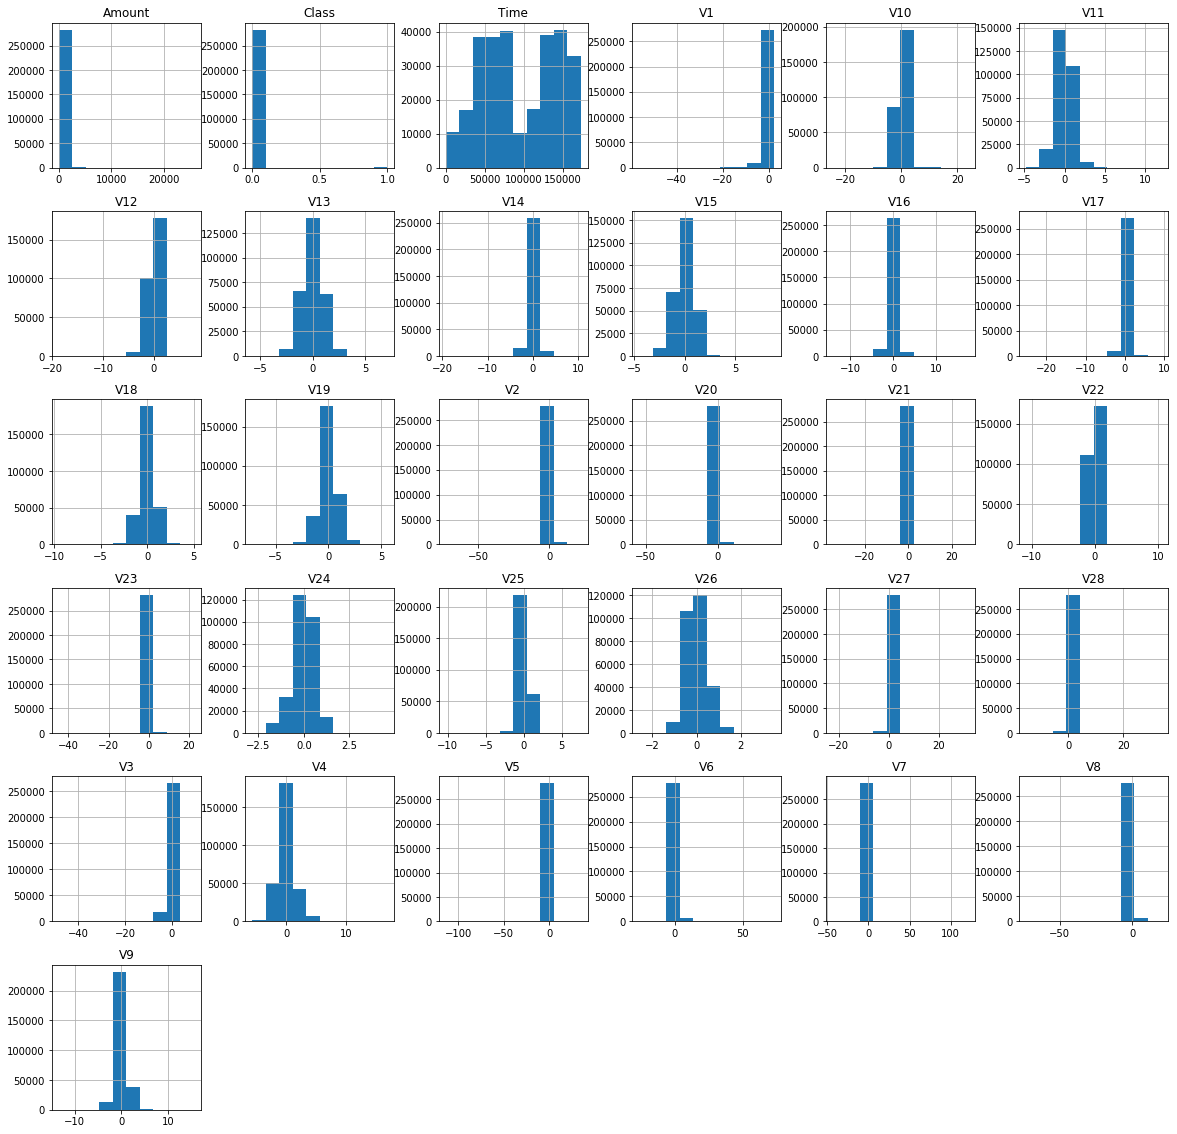

In [9]:
data.hist(figsize=(20, 20));

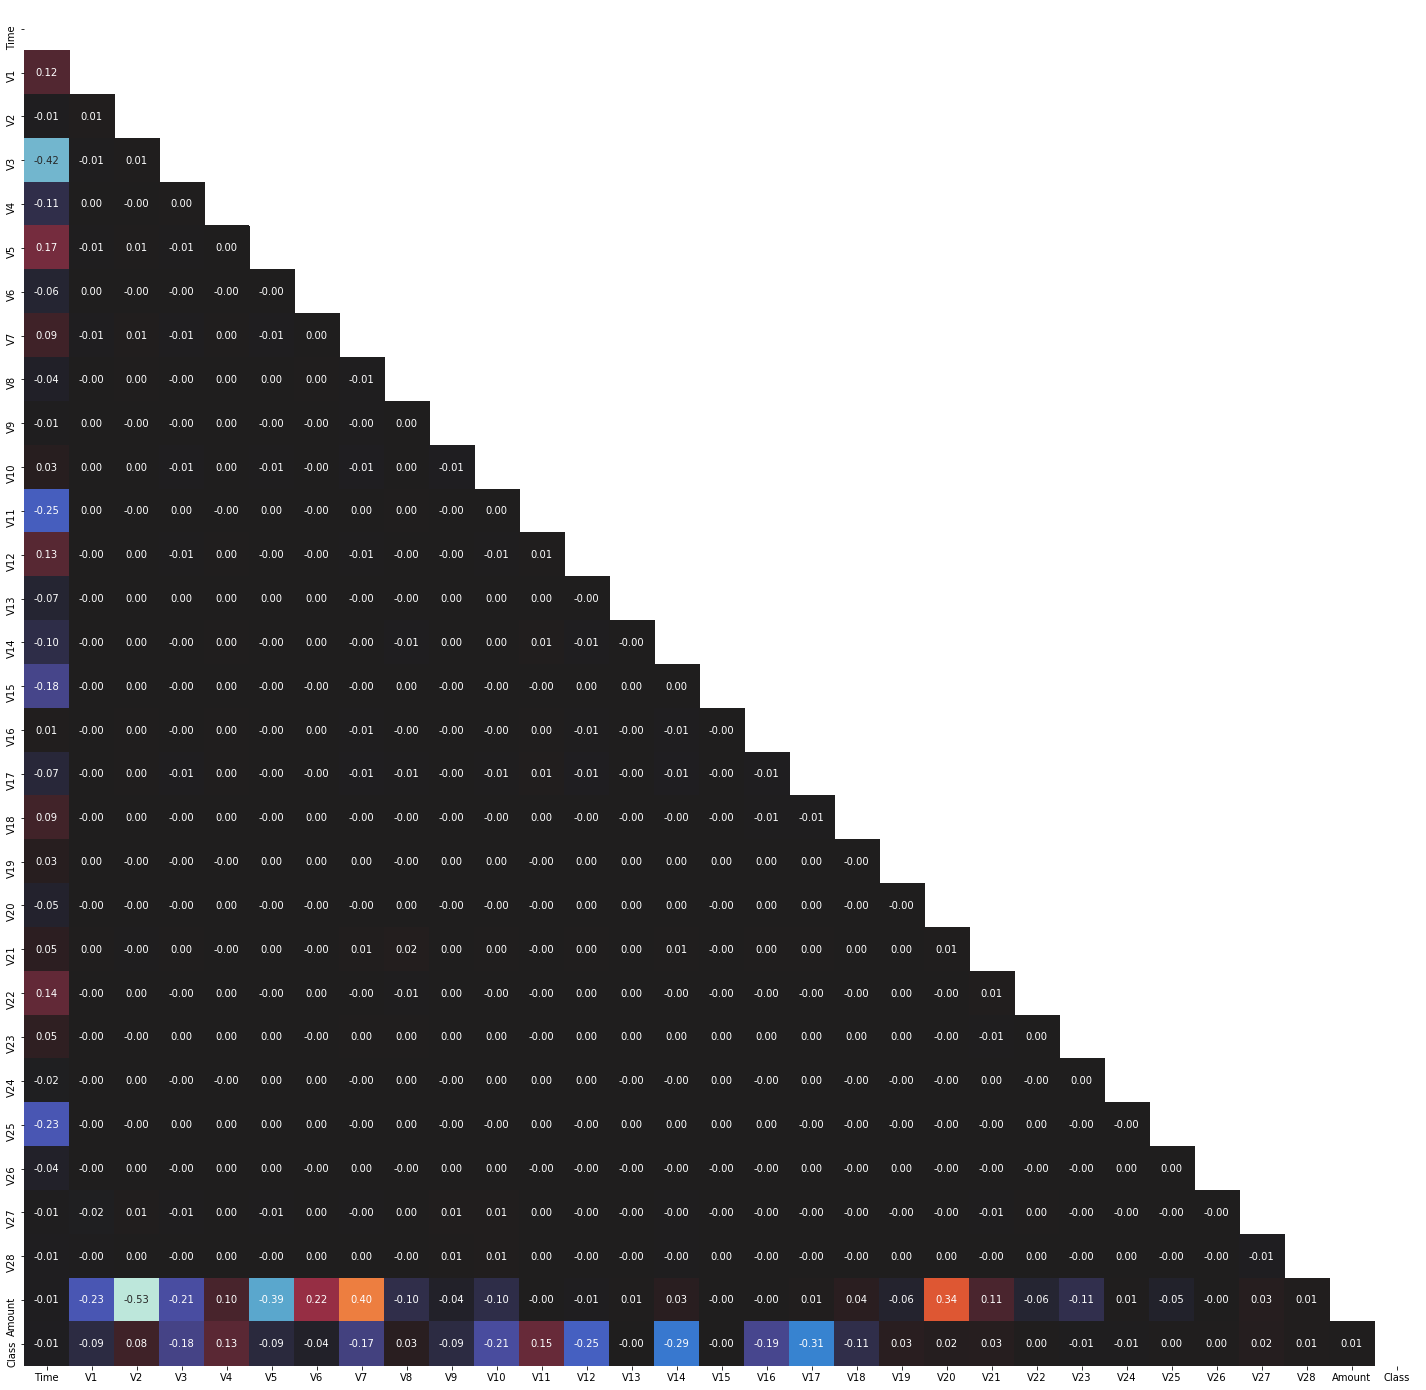

In [10]:
plt.figure(figsize=(25,25))

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

Как видим из heatmap в датасете нет сильноскоррелированных признаков

### <center> Baseline </center>

In [11]:
# Проверим целевую переменную на дисбаланс
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

**Заметим, что наблюдается огромный дисбаланс классов. Делаем предположение, что это базовый процент аномалий.**

In [12]:
# Вычислим нормальные и фродовые транзакции в данных
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

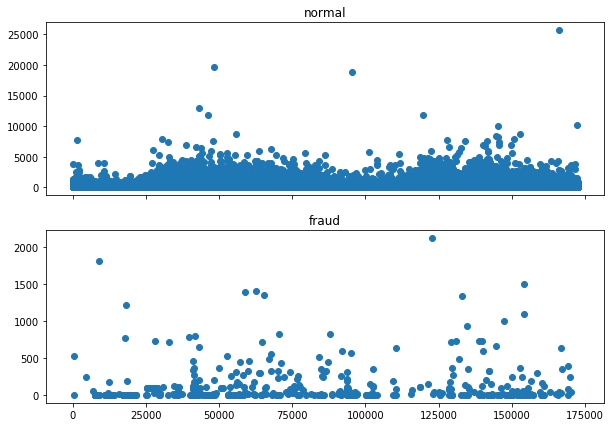

In [13]:
# Построим графики зависимости amount от time
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

ax1.scatter(normal.Time, normal.Amount)
ax1.set_title('normal')

ax2.scatter(fraud.Time, fraud.Amount)
ax2.set_title('fraud')
plt.subplots_adjust(hspace=.2)

plt.show()

In [14]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [15]:
# Вычислим базовый процент аномалий
anomalies_report(data['Class'])

Total number of outliers: 473
Percentage of outliers:   0.17%


In [16]:
# Удалим переменную time
data.drop(columns='Time', inplace=True)

---
<a id="1"></a>
## Simple research [(Наверх)](#0) 

### <center> 3-сигмы </center>

In [17]:
data_wo_class = data.iloc[:, :-1]

In [18]:
comparison_table = {}

for col in data_wo_class.columns:
    mean = data_wo_class[col].mean()
    std = data_wo_class[col].std()
    up_bound = mean + 3 * std
    low_bound = mean - 3 * std
    anomalies_std = pd.concat([data_wo_class[col]>up_bound, data_wo_class[col]<low_bound], axis=1).any(1)
    comparison_table[col] = [up_bound, low_bound, sum(anomalies_std), 100*sum(anomalies_std)/len(anomalies_std)]
    
comparison_table = pd.DataFrame(comparison_table).T
comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
comparison_table

upper_bound  lower_bound  anomalies_count  anomalies_percentage
V27        1.188995    -1.185469           4775.0              1.682962
V6         3.994652    -3.996931           4638.0              1.634676
V20        2.310140    -2.309766           4594.0              1.619168
V2         4.935974    -4.944244           4303.0              1.516604
V8         3.536309    -3.538018           4205.0              1.482064
V21        2.171358    -2.172099           4096.0              1.443646
Amount   839.670999  -662.725624           4063.0              1.432015
V1         5.849996    -5.838161           3647.0              1.285395
V10        3.227781    -3.230663           3450.0              1.215962
V12        2.983309    -2.984738           3446.0              1.214552
V7         3.684792    -3.681191           3404.0              1.199749
V19        2.439871    -2.440400           3395.0              1.196577
V14        2.856898    -2.856393           3378.0              1.190585
V23        1.871305    -1.870909           3356.0              1.182831
V28        0.984627    -0.983533           3236.0              1.140537
V4         4.239586    -4.245518           3101.0              1.092956
V5         4.132852    -4.129197           2913.0              1.026695
V25        1.563429    -1.563893           2799.0              0.986515
V17        2.527692    -2.527352           2520.0              0.888181
V9         3.284881    -3.288074           2252.0              0.793724
V16        2.622251    -2.619927           2085.0              0.734864
V3         4.527659    -4.524433           1953.0              0.688340
V18        2.513648    -2.510617           1669.0              0.588244
V15        2.745724    -2.743638           1252.0              0.441271
V22        2.173636    -2.173666           1212.0              0.427173
V13        2.986892    -2.985686           1189.0              0.419066
V26        1.446308    -1.446009           1044.0              0.367961
V11        3.056362    -3.055959            661.0              0.232971
V24        1.817094    -1.816666            659.0              0.232266

### <center> Межквартильное отклонение </center>

In [19]:
comparison_table = {}

for col in data_wo_class.columns:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * 3)
    low_bound = data[col].quantile(0.25) - (IQR * 3)
    anomalies_iqr = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    comparison_table[col] = [up_bound, low_bound, sum(anomalies_iqr), 100*sum(anomalies_iqr)/len(anomalies_iqr)]
    
comparison_table = pd.DataFrame(comparison_table).T
comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
comparison_table

upper_bound  lower_bound  anomalies_count  anomalies_percentage
Amount   293.240000  -210.130000          18802.0              6.626816
V27        0.576755    -0.556188          16271.0              5.734758
V20        1.167236    -1.245498          13251.0              4.670351
V28        0.471558    -0.446100          12399.0              4.370061
V8         1.929300    -1.812425          11163.0              3.934430
V23        1.076104    -1.090059           8109.0              2.858039
V21        1.429689    -1.471800           6876.0              2.423465
V6         3.894261    -4.266499           5415.0              1.908531
V2         5.002093    -4.802131           4430.0              1.561366
V10        3.421209    -3.503169           3095.0              1.090841
V7         3.939424    -3.921459           3006.0              1.059473
V14        3.246540    -3.179936           2333.0              0.822272
V5         4.518361    -4.595973           2280.0              0.803592
V1         8.012125    -7.612009           1949.0              0.686930
V17        3.047670    -3.132625           1419.0              0.500130
V12        3.686499    -3.475720           1285.0              0.452902
V9         4.316570    -4.364814           1040.0              0.366551
V3         6.776886    -6.639608            738.0              0.260110
V19        3.202898    -3.200679            623.0              0.219578
V16        3.494625    -3.437973            571.0              0.201251
V26        1.941335    -2.027838            514.0              0.181161
V4         5.508991    -5.619479            469.0              0.165300
V25        2.355126    -2.321944            444.0              0.156489
V18        3.501866    -3.497924            270.0              0.095162
V22        3.741080    -3.755534            186.0              0.065556
V11        5.243265    -5.265335            144.0              0.050753
V24        2.822314    -2.737029            137.0              0.048286
V15        4.344772    -4.276120             18.0              0.006344
V13        4.596299    -4.580983              2.0              0.000705

---
<a id="1"></a>
## ML [(Наверх)](#0) 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Class'], axis=1), data['Class'],
                                                    test_size=0.3, stratify=data['Class'], random_state=24)

In [22]:
X = data.iloc[:, :-1]
y = data['Class']

In [23]:
# Проведем шкалирование переменных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### <center> OneClassSVM </center>

In [24]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.0017, gamma='auto')
one_class_svm.fit(X_scaled, y)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.0017, shrinking=True, tol=0.001, verbose=False)

In [25]:
svm_prediction = one_class_svm.predict(X_scaled)
svm_prediction[svm_prediction == 1] = 0
svm_prediction[svm_prediction == -1] = 1

In [26]:
print(classification_report(y, svm_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.07      0.23      0.11       473

    accuracy                           0.99    283726
   macro avg       0.54      0.61      0.56    283726
weighted avg       1.00      0.99      1.00    283726



In [27]:
anomalies_report(svm_prediction)

Total number of outliers: 1487
Percentage of outliers:   0.52%


### <center> IsolationForest </center>

In [28]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.0017,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(X_scaled, y)
iso_prediction = isolation_forest.predict(X_scaled)
iso_prediction[iso_prediction == 1] = 0
iso_prediction[iso_prediction == -1] = 1

In [29]:
print(classification_report(y, iso_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.24      0.25      0.24       473

    accuracy                           1.00    283726
   macro avg       0.62      0.62      0.62    283726
weighted avg       1.00      1.00      1.00    283726



In [30]:
anomalies_report(iso_prediction)

Total number of outliers: 483
Percentage of outliers:   0.17%


### <center> Визуализация tSNE </center>

In [31]:
from openTSNE import TSNE
tsne = TSNE(perplexity=50, n_jobs=-1)
tsne_transformed = tsne.fit(X_scaled)

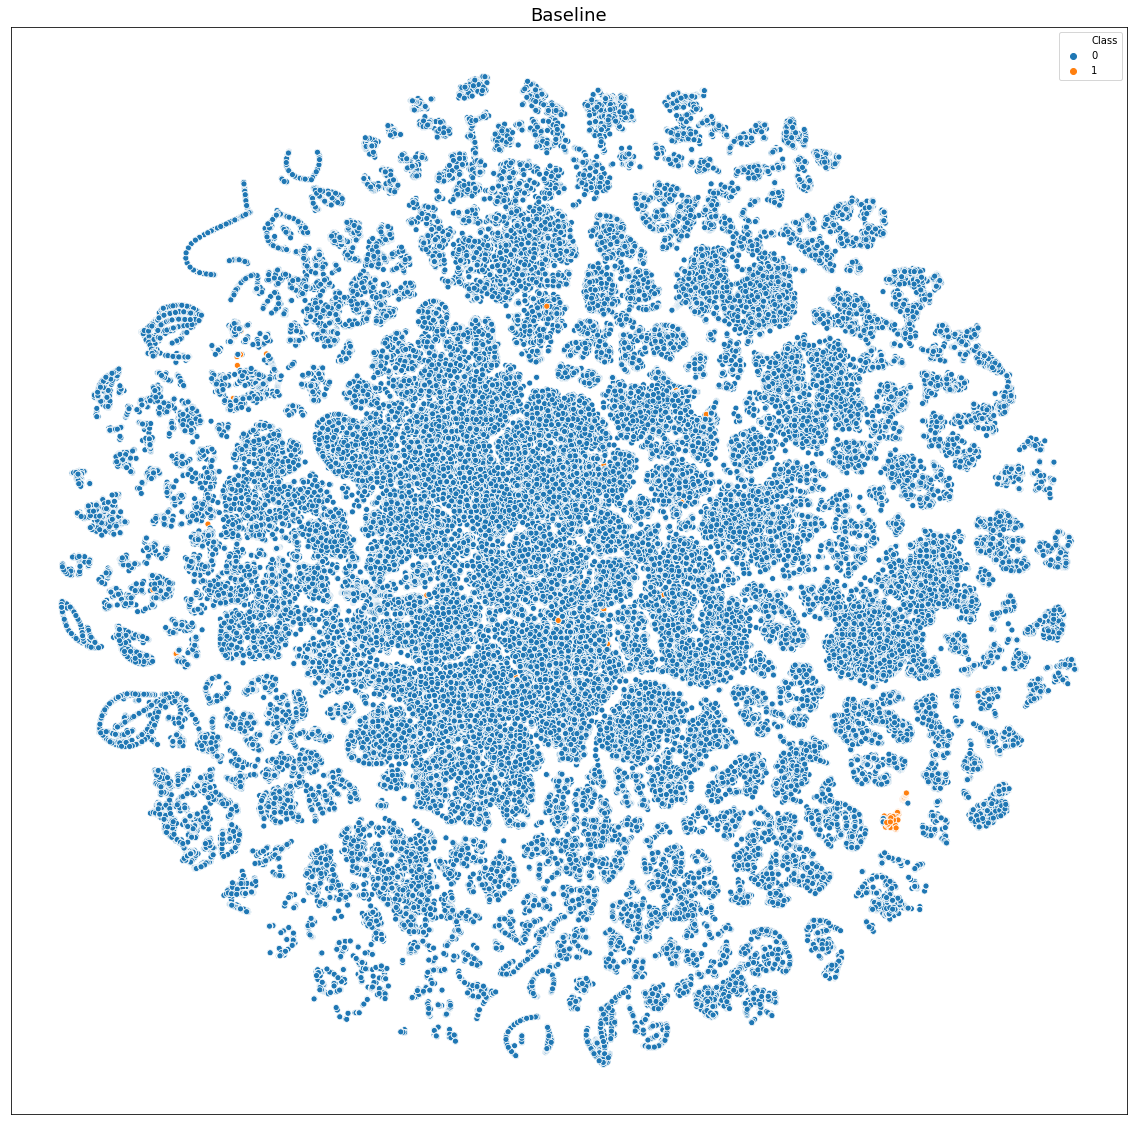

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=y, 
    legend='full'
)
plt.title("Baseline", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

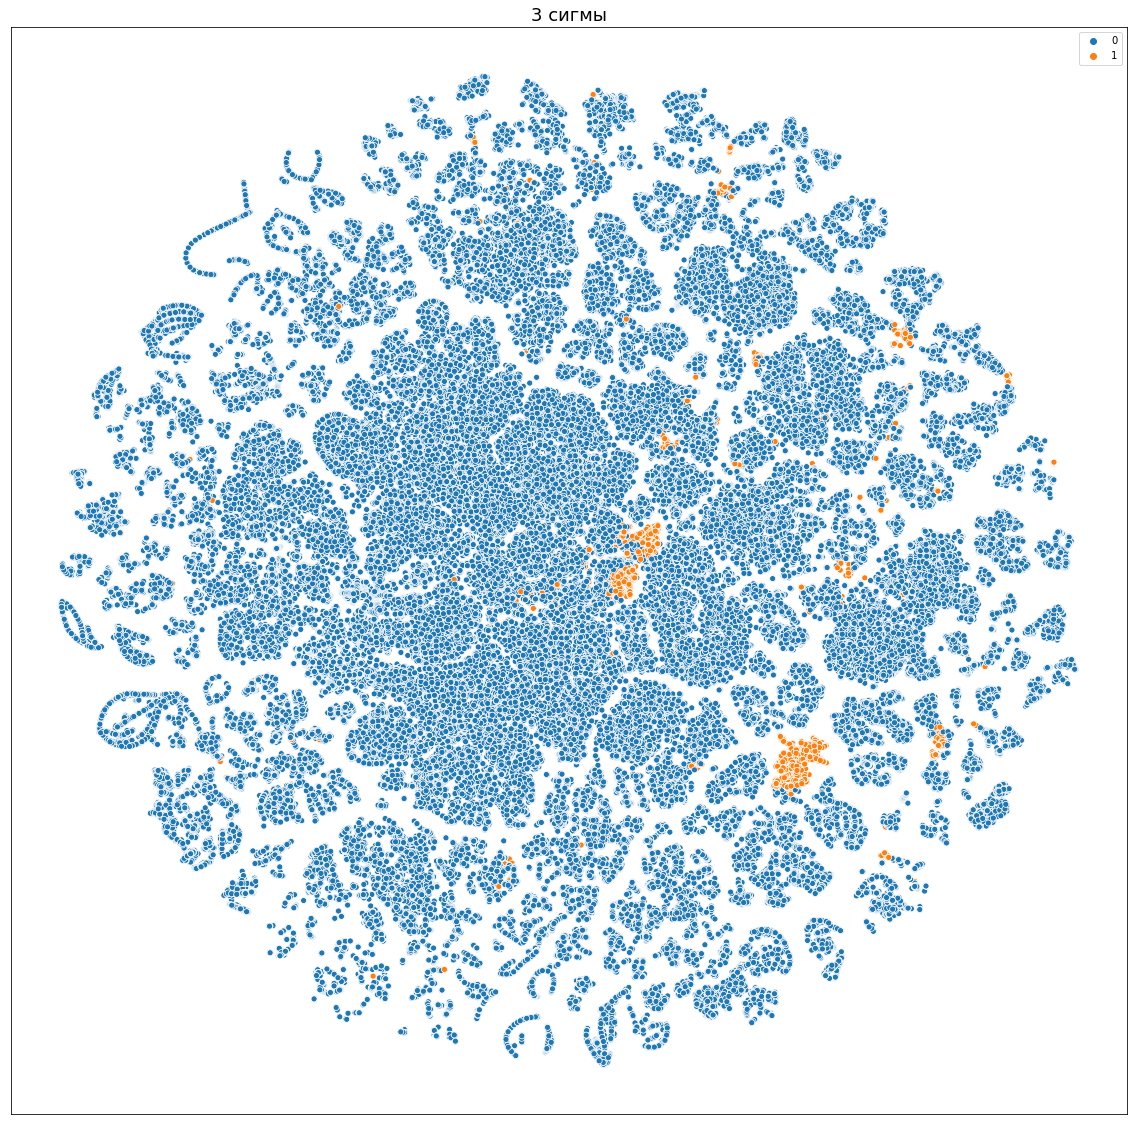

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=anomalies_std.astype(int), 
    legend='full'
)
plt.title("3 сигмы", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

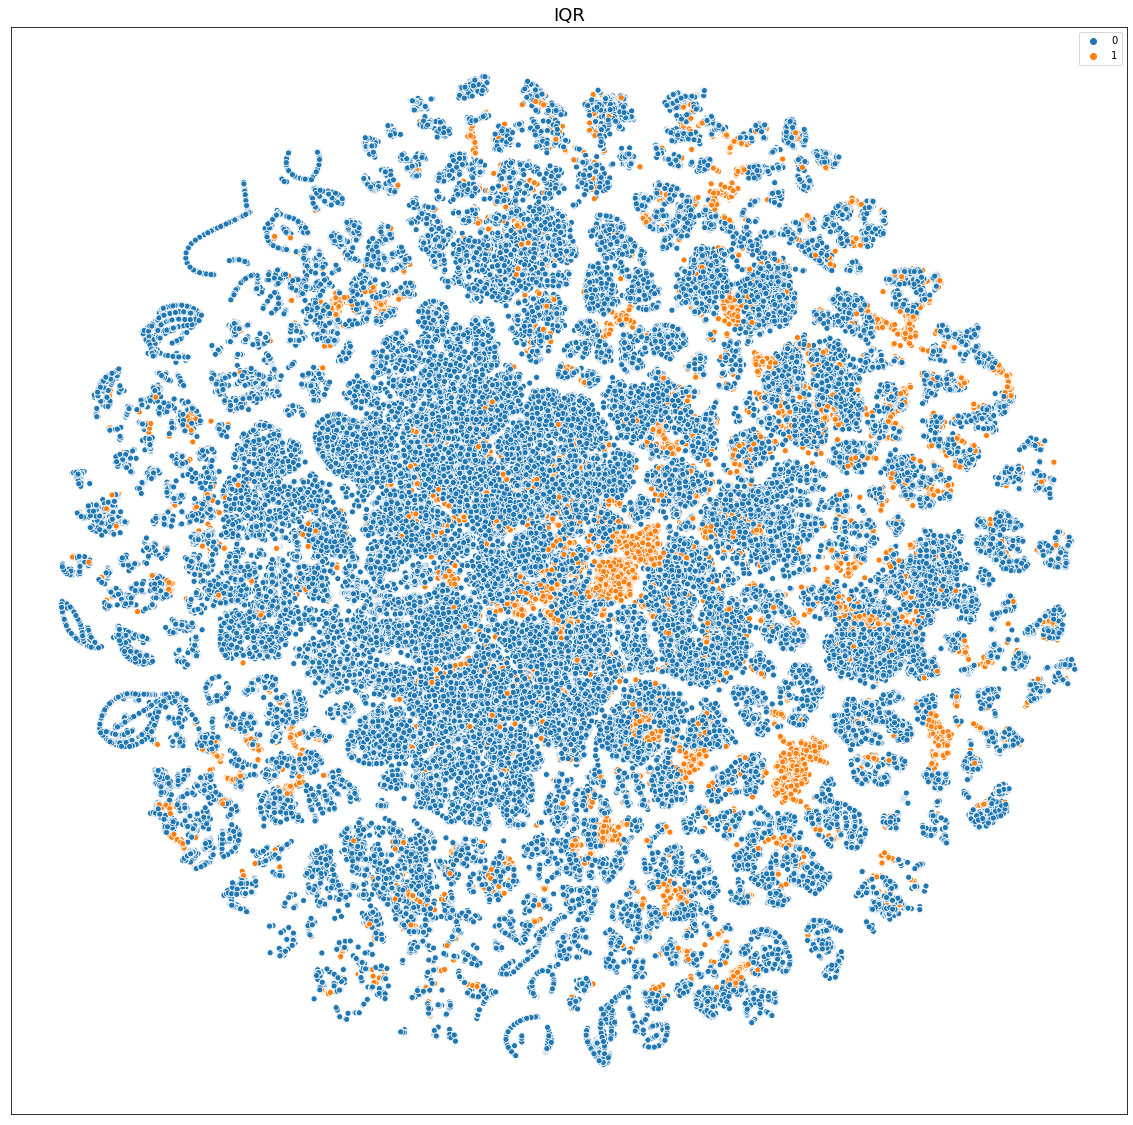

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=anomalies_iqr.astype(int), 
    legend='full'
)
plt.title("IQR", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

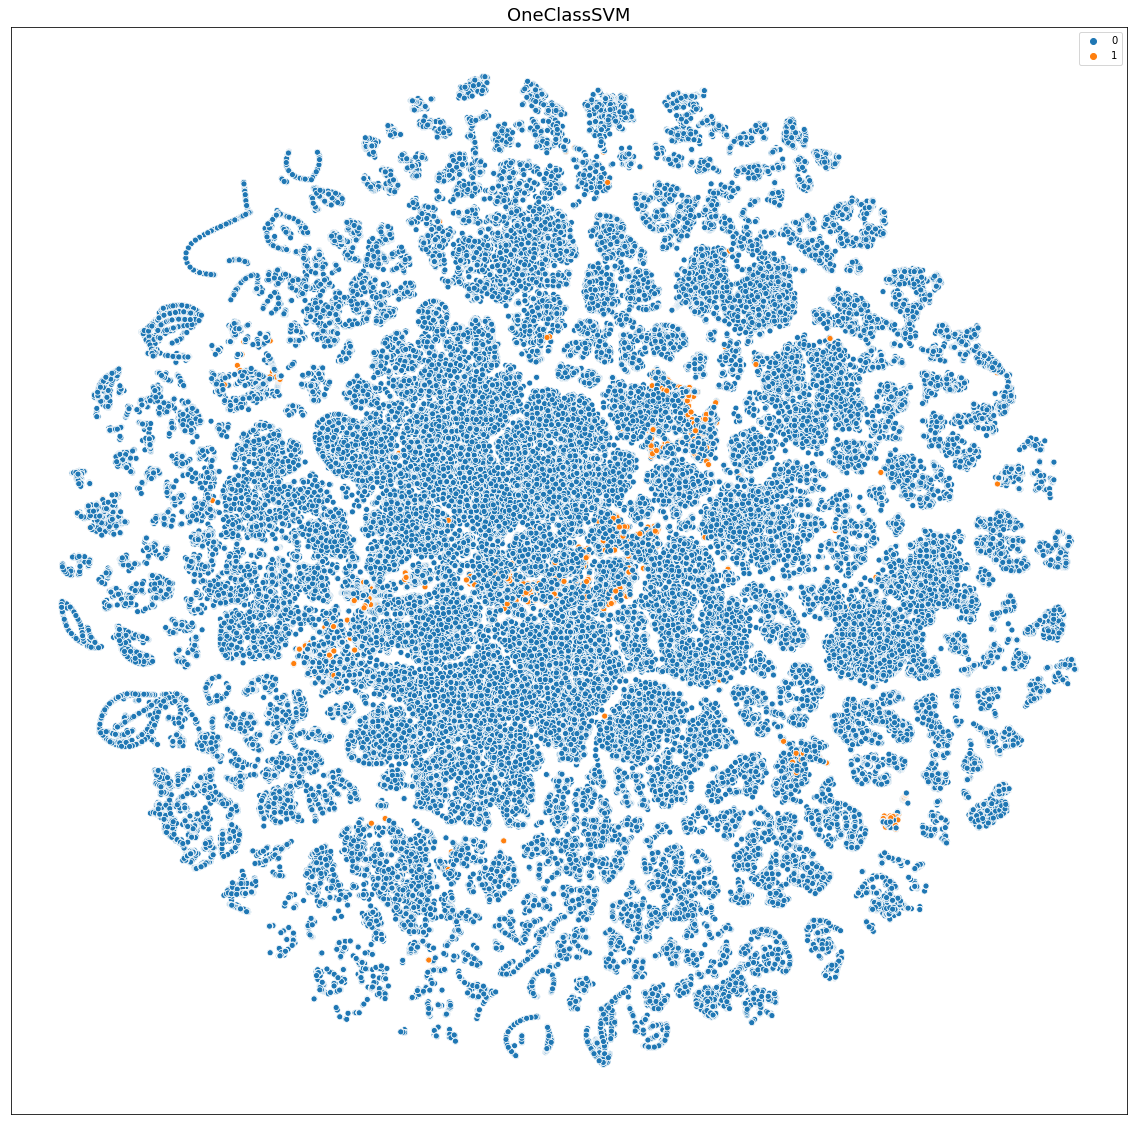

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=svm_prediction, 
    legend='full'
)
plt.title("OneClassSVM", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

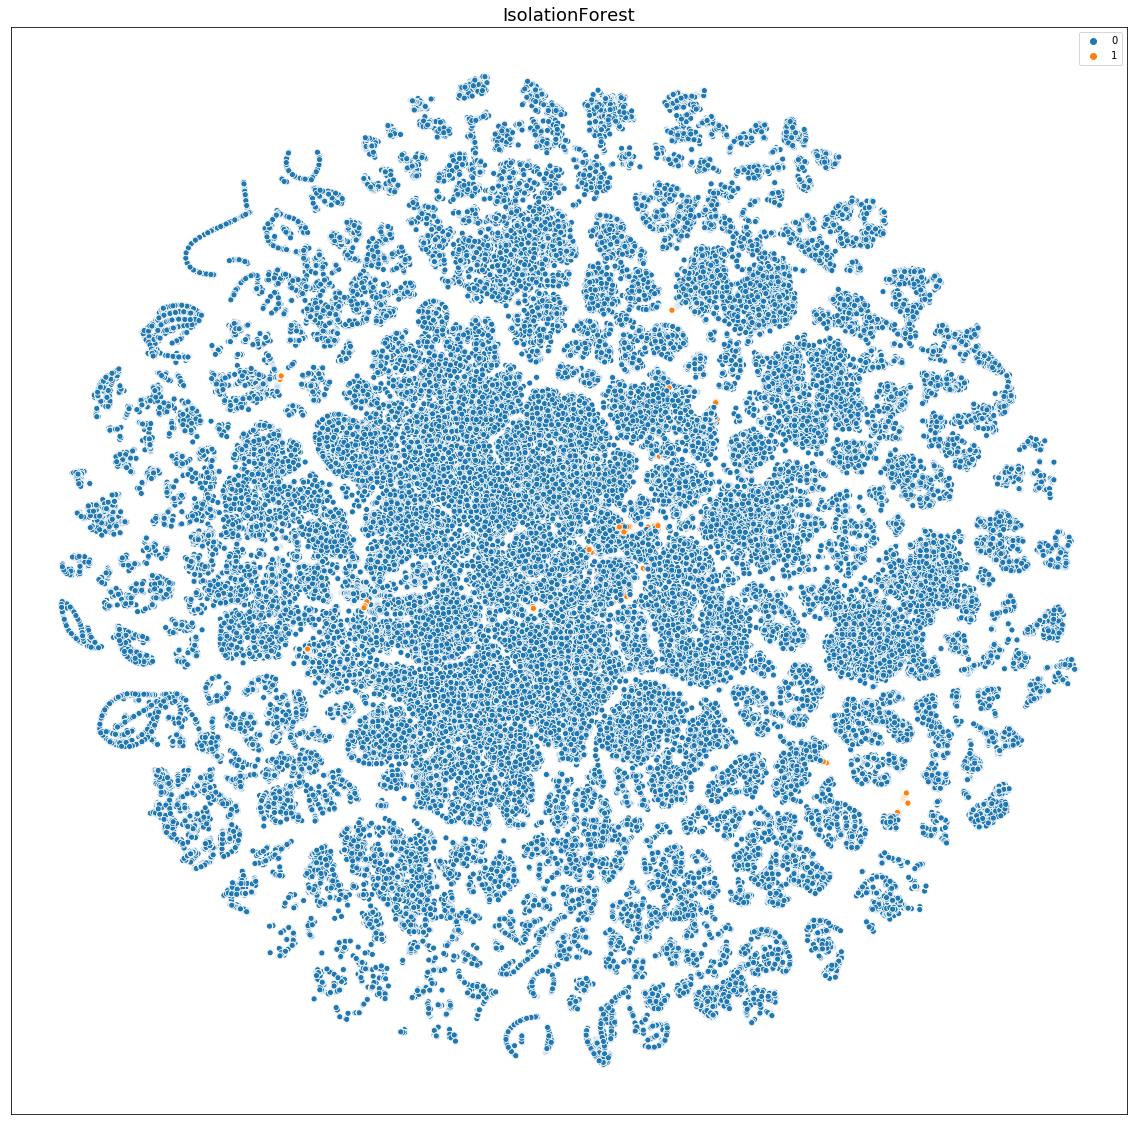

In [36]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=iso_prediction, 
    legend='full'
)
plt.title("IsolationForest", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()